In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [393]:
factors = pd.read_csv('/Users/nanyueming/Documents/学习/量化策略/弗居投资面试题/Data/FACTOR.csv').T

In [3]:
returns = pd.read_csv('/Users/nanyueming/Documents/学习/量化策略/弗居投资面试题/Data/FMRTN1W.csv',parse_dates=True)

In [4]:
returns.rename(columns={"Unnamed: 0":"stocks"},inplace = True)
returns.set_index('stocks',inplace = True)
returns.columns = pd.to_datetime(returns.columns)

In [5]:
returns

,2008-01-04,2008-01-11,2008-01-18,2008-01-25,2008-02-01,2008-02-05,2008-02-15,2008-02-22,2008-02-29,2008-03-07,...,2016-11-25,2016-12-02,2016-12-09,2016-12-16,2016-12-23,2016-12-30,2017-01-06,2017-01-13,2017-01-20,2017-01-27
stocks,,,,,,,,,,,,,,,,,,,,,
2,0.03420,-0.18328,-0.01746,0.12769,-0.06548,-0.04076,-0.17565,0.02554,-0.05942,-0.00957,...,-0.03393,-0.09194,-0.09746,-0.02156,0.00387,-0.00726,0.01632,-0.01246,-0.00145,0.00289
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.03972,-0.04687,0.10032,-0.00593,0.01610,-0.02737,-0.11703,-0.01847,0.04350,-0.01309
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.05801,-0.05276,0.01885,-0.01302,-0.00584,0.02601,-0.09333,0.01388,0.00458,0.01061
6,0.04691,-0.17699,0.03062,0.04843,0.02265,0.01303,-0.08646,0.02677,-0.11505,-0.13680,...,-0.10514,0.01556,0.11053,-0.05270,0.00622,0.00926,-0.16341,0.01760,0.01843,0.00456
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.05915,-0.05112,0.04102,-0.02441,0.02568,-0.02806,-0.00823,-0.01005,0.01871,0.00602
603883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.03941,-0.05728,-0.00213,-0.00278,0.00809,0.00021,-0.08414,0.02509,0.00135,0.01119
603899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [394]:
factors.columns=factors.iloc[0].values

In [395]:
factors.drop(factors.index[0], inplace = True)

In [396]:
factors.index = pd.to_datetime(factors.index)

接下来开始按因子打分给股票分层

In [9]:
date = []
coverage = []
back_test_long = []
back_test_short = []
position_1 = []
position_2 = []
position_3 = []
position_4 = []
position_5 = []

In [10]:
def generate_position(data):
    
    data.dropna(inplace = True)
    data.sort_values(ascending = False,inplace = True)
    
    q1 = data.quantile(0.2)  #These are the quantile of convered stocks
    q2 = data.quantile(0.4)
    q3 = data.quantile(0.6)
    q4 = data.quantile(0.8)
    
    coverage.append(len(data))  #This shows the number of stocks covered by the strategy
    
    stock = pd.DataFrame(data)
    position5 = stock[(stock[i] >= q4)].index.tolist() #this generates stocks to be long&short 
    position4 = stock[(stock[i] < q4)&(stock[i] >= q3)].index.tolist()
    position3 = stock[(stock[i] < q3)&(stock[i] >= q2)].index.tolist()
    position2 = stock[(stock[i] < q2)&(stock[i] >= q1)].index.tolist()
    position1 = stock[(stock[i] < q1)].index.tolist()
    
    back_test_long.append(position5) 
    back_test_short.append(position1)
    
    position_1.append(position1)
    position_2.append(position2)
    position_3.append(position3)
    position_4.append(position4)
    position_5.append(position5)
    
    return

In [11]:
for i,scores in factors.iterrows():   
    generate_position(scores)
    date.append(i)

In [12]:
back_test = pd.DataFrame(zip(date,coverage),columns = ['date' , 'coverage'])

In [13]:
back_test_l = pd.DataFrame(back_test_long)
back_test_s = pd.DataFrame(back_test_short)

back_test_p1 = pd.DataFrame(position_1)
back_test_p2 = pd.DataFrame(position_2)
back_test_p3 = pd.DataFrame(position_3)
back_test_p4 = pd.DataFrame(position_4)
back_test_p5 = pd.DataFrame(position_5)

In [14]:
dates = pd.DataFrame(date,columns = ['date'])
back_test_l = back_test_l.join(dates)
back_test_s = back_test_s.join(dates)

back_test_p1 = back_test_p1.join(dates)
back_test_p2 = back_test_p2.join(dates)
back_test_p3 = back_test_p3.join(dates)
back_test_p4 = back_test_p4.join(dates)
back_test_p5 = back_test_p5.join(dates)

# 计算收益率

In [15]:
def calculate_return(data , date):
    
    # this function can calculate the returns of your holdings
    
    r = 0
    for i in data:
        r = r + (returns[date][i])/len(data)
    return r

计算多空组合的收益率

In [16]:
back_test['rl'] = 0.0
back_test['rs'] = 0.0
back_test['K'] = 0
back_test['L'] = 0
back_test['N'] = 0

In [17]:
for i in range(len(back_test_l)-1):
    
    #生成多头仓收益率
    
    data_l_t = back_test_l.iloc[i,:-1]
    data_l_t = list(data_l_t.dropna())
    
    day = back_test_l.loc[i,"date"]
    
    r = calculate_return(data_l_t,day)
    back_test['rl'][back_test['date']==day] = r
    
    N = len(data_l_t)
    back_test['N'][back_test['date']==day] = back_test['N'][back_test['date']==day] + N
    
    data_l_t1 = back_test_l.iloc[i+1,:]
    reinvest = list(set(data_l_t)-set(data_l_t1))
    K = len(reinvest)
    back_test['K'][back_test['date']==day] = K

In [18]:
for i in range(len(back_test_s)-1): 
    
    #生成空头仓收益率
    
    data_s_t = back_test_s.iloc[i,:-1]
    data_s_t = list(data_s_t.dropna())
    day = back_test_s.loc[i,"date"]
    r = calculate_return(data_s_t,day)
    back_test['rs'][back_test['date']==day] = r
    
    N = len(data_s_t)
    back_test['N'][back_test['date']==day] = back_test['N'][back_test['date']==day] + N
    
    data_s_t1 = back_test_s.iloc[i+1,:]
    reinvest = list(set(data_s_t)-set(data_s_t1))
    L = len(reinvest)
    back_test['L'][back_test['date']==day] = L

In [19]:
back_test['r'] = back_test['rl']/2 - back_test['rs']/2

In [ ]:
back_test.set_index('date',inplace = True,drop = False)
back_test.index = pd.to_datetime(back_test.index)

In [20]:
back_test['net_value'] = 1.0

In [21]:
for i in range(len(back_test)):
    back_test['net_value'][i+1] = back_test['net_value'][i]*(1+back_test['r'][i])

<AxesSubplot:xlabel='date'>

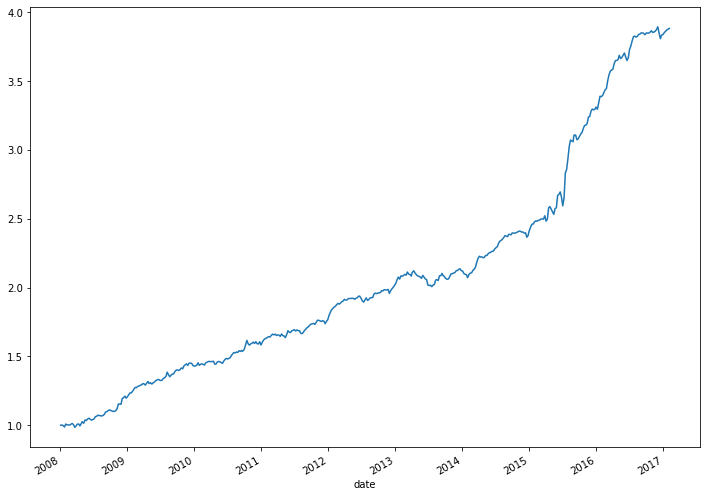

In [389]:
back_test['net_value'].plot(figsize = (12,9))

# 评价指标

生成5个quantile的收益率序列，计算5个q的收益

In [23]:
back_test['rp1'] = 0.0
for i in range(len(back_test_p1)-1):
    data_t = back_test_p1.iloc[i,:-1]
    data_t = list(data_t.dropna())
    day = back_test_p1.loc[i,"date"]
    r = calculate_return(data_t,day)
    back_test['rp1'][back_test['date']==day] = r

In [24]:
back_test['rp2'] = 0.0
for i in range(len(back_test_p2)-1):
    data_t = back_test_p2.iloc[i,:-1]
    data_t = list(data_t.dropna())
    day = back_test_p2.loc[i,"date"]
    r = calculate_return(data_t,day)
    back_test['rp2'][back_test['date']==day] = r

In [25]:
back_test['rp3'] = 0.0
for i in range(len(back_test_p3)-1):
    data_t = back_test_p3.iloc[i,:-1]
    data_t = list(data_t.dropna())
    day = back_test_p3.loc[i,"date"]
    r = calculate_return(data_t,day)
    back_test['rp3'][back_test['date']==day] = r

In [26]:
back_test['rp4'] = 0.0
for i in range(len(back_test_p4)-1):
    data_t = back_test_p4.iloc[i,:-1]
    data_t = list(data_t.dropna())
    day = back_test_p4.loc[i,"date"]
    r = calculate_return(data_t,day)
    back_test['rp4'][back_test['date']==day] = r

In [27]:
back_test['rp5'] = 0.0
for i in range(len(back_test_p5)-1):
    data_t = back_test_p5.iloc[i,:-1]
    data_t = list(data_t.dropna())
    day = back_test_p5.loc[i,"date"]
    r = calculate_return(data_t,day)
    back_test['rp5'][back_test['date']==day] = r

In [28]:
from scipy.stats.mstats import gmean

计算年化收益率

In [29]:
def annualized_returns(data):
    
    #画年化收益率图
    
    
    quantile_1 = gmean(1+data['rp1'])**55 - 1
    quantile_2 = gmean(1+data['rp2'])**55 - 1
    quantile_3 = gmean(1+data['rp3'])**55 - 1
    quantile_4 = gmean(1+data['rp4'])**55 - 1
    quantile_5 = gmean(1+data['rp5'])**55 - 1
    S = gmean(1+back_test['r'])**55 - 1
    
    annualized_r = [quantile_1 , quantile_2 , quantile_3 , quantile_4 , quantile_5 , S]
    
    plt.bar(['quantile_1' , 'quantile_2' , 'quantile_3' , 'quantile_4' , 'quantile_5' , 'S'],
            annualized_r)
    plt.xticks(rotation=45)
    plt.title('Annualized Return (%)')
    
    

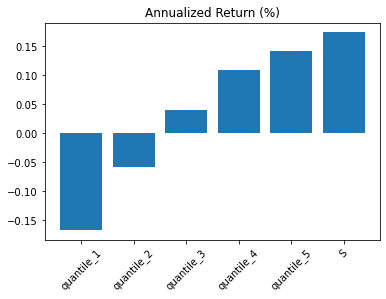

In [30]:
annualized_returns(back_test)

年化波动率

In [31]:
def annualized_volatilities(data):
    quantile_1 = np.sqrt(12)*back_test['rp1'].std()
    quantile_2 = np.sqrt(12)*back_test['rp2'].std()
    quantile_3 = np.sqrt(12)*back_test['rp3'].std()
    quantile_4 = np.sqrt(12)*back_test['rp4'].std()
    quantile_5 = np.sqrt(12)*back_test['rp5'].std()
    S = np.sqrt(12)*back_test['r'].std()
    
    annualized_volatility = [quantile_1 , quantile_2 , quantile_3 , quantile_4 , quantile_5 , S]
    
    plt.bar(['quantile_1' , 'quantile_2' , 'quantile_3' , 'quantile_4' , 'quantile_5' , 'S'],
            annualized_volatility)
    plt.xticks(rotation=45)
    plt.title('Annualized Volatility (%)')

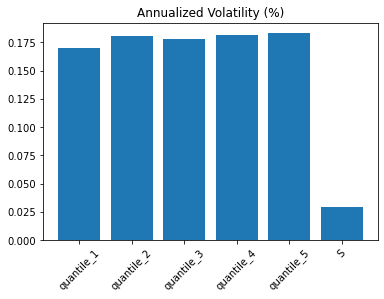

In [32]:
annualized_volatilities(back_test)

计算每周组合里覆盖的股票数量

Text(0.5, 1.0, 'Coverage of Portfolios')

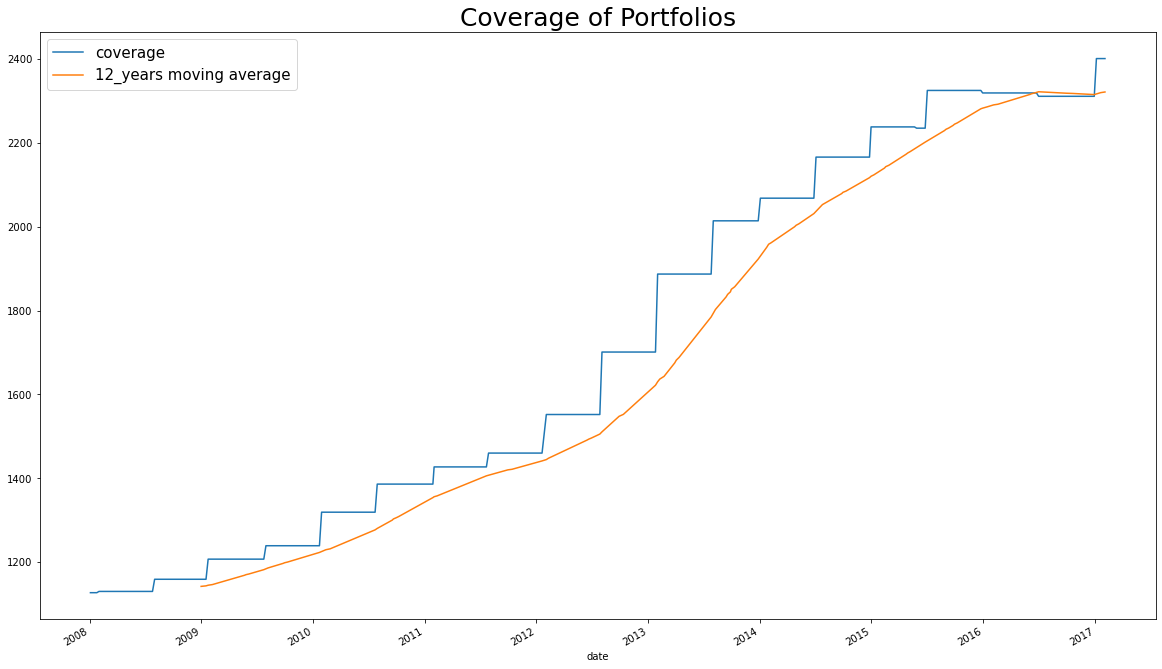

In [391]:
back_test['coverage_MA12'] = back_test['coverage'].rolling(52).mean()
back_test['coverage'].plot(figsize = (20,12))
back_test['coverage_MA12'].plot()
plt.legend(['coverage','12_years moving average'],
          loc = 'upper left',
          fontsize = 15)
plt.title('Coverage of Portfolios',fontsize = 25)

计算换手率

In [34]:
back_test['factor_turnover'] = ( back_test['K'] + back_test['L'] ) / back_test['N']
back_test['ft_MA12'] = back_test['factor_turnover'].rolling(52).mean()

Text(0.5, 1.0, 'Factor Turnover (%)')

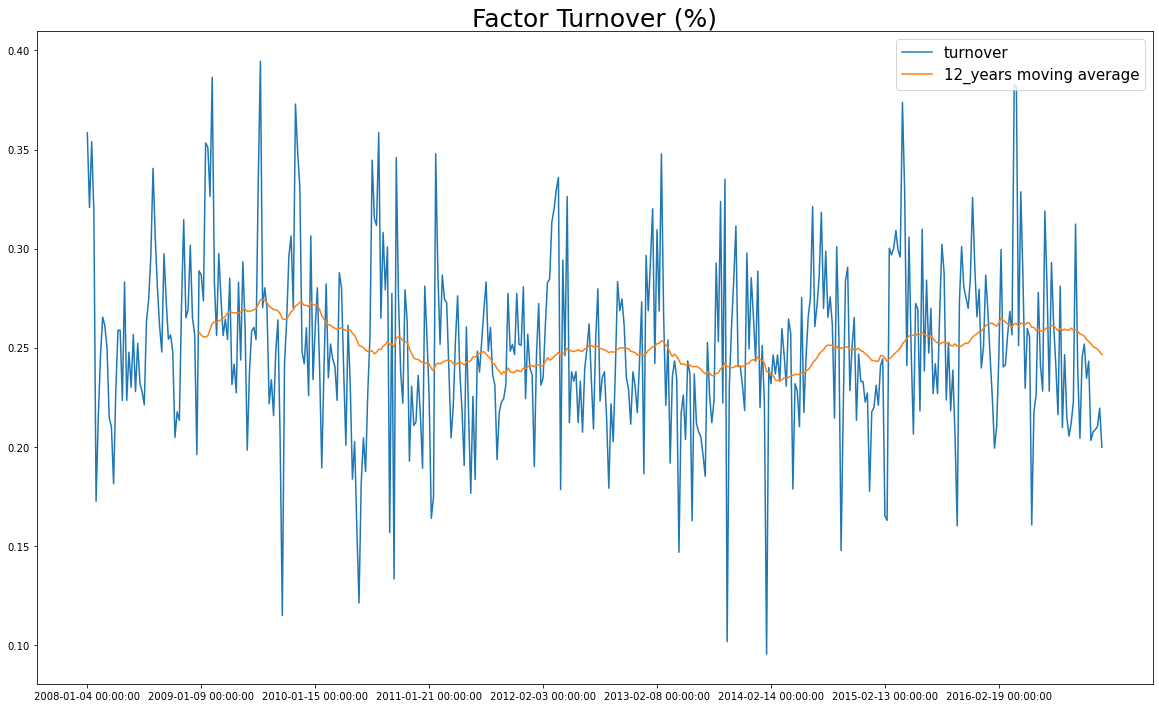

In [35]:
back_test['factor_turnover'].plot(figsize = (20,12))
back_test['ft_MA12'].plot()
plt.legend(['turnover','12_years moving average'],
          loc = 'upper right',
          fontsize = 15)
plt.xticks(range(len(back_test['date']))[::52],back_test['date'][::52])
plt.title('Factor Turnover (%)',fontsize = 25)

计算信息比率

    信息比率用来衡量主动投资相对于被动投资的超额风险报酬，与夏普比率雷同。但夏普比率是相对于无风险利率。

In [36]:
def IR(data):
    ir1 = data['rp1'].mean()/data['rp1'].std()
    ir2 = data['rp2'].mean()/data['rp2'].std()
    ir3 = data['rp3'].mean()/data['rp3'].std()
    ir4 = data['rp4'].mean()/data['rp4'].std()
    ir5 = data['rp5'].mean()/data['rp5'].std()
    irs = data['r'].mean()/data['r'].std()
    
    ir = [ir1 , ir2 , ir3 , ir4 , ir5 , irs]
    
    plt.bar(['quantile_1' , 'quantile_2' , 'quantile_3' , 'quantile_4' , 'quantile_5' , 'S'],
            ir)
    plt.xticks(rotation=45)
    plt.title('Information Ratio (%)')

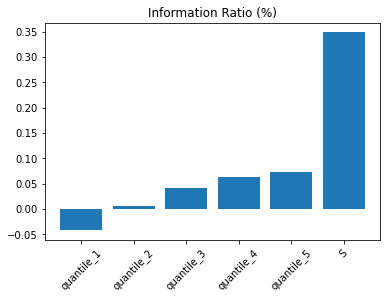

In [37]:
IR(back_test)

生成日期的序列作为横坐标

In [352]:
month_range = pd.date_range('1/4/2008', '2/3/2017' , freq = 'M').strftime("%Y")

计算分位数月累计收益率

In [43]:
def cumulative_return(ts):
    
    #计算一段时间内的累计收益
    
    cr = 1.0
    for i in range(len(ts)):
       cr = cr * (1 + ts[i])
    return cr

    按月分组，计算每个月的累计收益率

In [44]:
RSI3M_q1 = back_test['rp1'].groupby([back_test.index.year,back_test.index.month]).apply(cumulative_return).to_list()
RSI3M_q2 = back_test['rp2'].groupby([back_test.index.year,back_test.index.month]).apply(cumulative_return).to_list()
RSI3M_q3 = back_test['rp3'].groupby([back_test.index.year,back_test.index.month]).apply(cumulative_return).to_list()
RSI3M_q4 = back_test['rp4'].groupby([back_test.index.year,back_test.index.month]).apply(cumulative_return).to_list()
RSI3M_q5 = back_test['rp5'].groupby([back_test.index.year,back_test.index.month]).apply(cumulative_return).to_list()

In [45]:
def monthly_return(data):
    
    #计算累计收益序列
    
    mr = []
    r = 1.0
    for i in range(len(data)):
        r = r * data[i]
        mr.append(r)
    return mr      

    用所得的月收益率画累计收益率曲线

In [46]:
RSI3M_quantile1 = monthly_return(RSI3M_q1)
RSI3M_quantile2 = monthly_return(RSI3M_q2)
RSI3M_quantile3 = monthly_return(RSI3M_q3)
RSI3M_quantile4 = monthly_return(RSI3M_q4)
RSI3M_quantile5 = monthly_return(RSI3M_q5)

Text(0.5, 1.0, 'Quantile Returns')

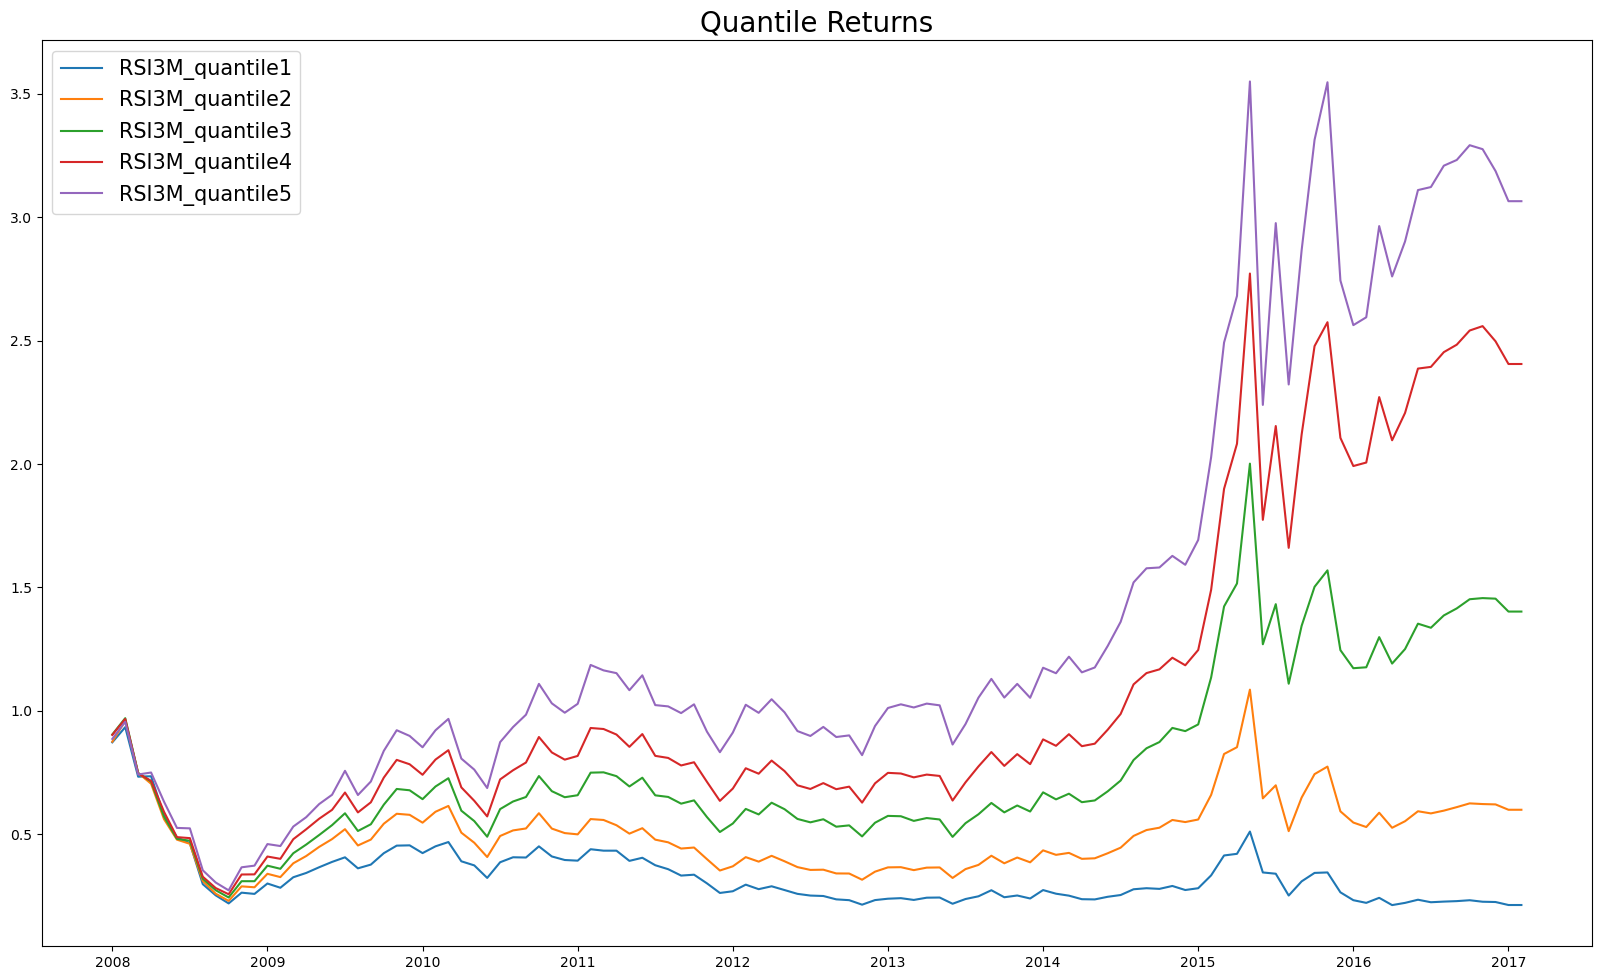

In [47]:
plt.figure(figsize = (20,12) , dpi = 100)
plt.plot(RSI3M_quantile1)
plt.plot(RSI3M_quantile2)
plt.plot(RSI3M_quantile3)
plt.plot(RSI3M_quantile4)
plt.plot(RSI3M_quantile5)
plt.legend(['RSI3M_quantile1','RSI3M_quantile2','RSI3M_quantile3','RSI3M_quantile4','RSI3M_quantile5'],
           loc = 'upper left',
           fontsize = 15)
plt.xticks(range(len(month_range))[::12],month_range[::12])
plt.title('Quantile Returns',fontsize = 20)

计算因子打分的序列相关性

In [397]:
times = list(factors.index.drop_duplicates())

In [432]:
back_test['serial_correlation'] = 0.0
for time in range(len(times)-1):
    
    array1 = factors[factors.index == times[time]].values
    list1 = []
    for i in range(array1.shape[1]):
        if np.isnan(array1[0,i]) == False:
            list1.append(array1[0,i])
    
    
    array2 = factors[factors.index == times[time+1]].values
    list2 = []
    for j in range(array2.shape[1]):
        if np.isnan(array2[0,j]) == False:
            list2.append(array2[0,j])
        
        
    list1 = pd.Series(list1)
    list2 = pd.Series(list2)
  
    corr = round(list1.corr(list2), 4)
    
    back_test["serial_correlation"][time] = corr


In [433]:
back_test['sc_12MA'] = back_test['serial_correlation'].rolling(12).mean()

Text(0.5, 1.0, 'Serial Correlation')

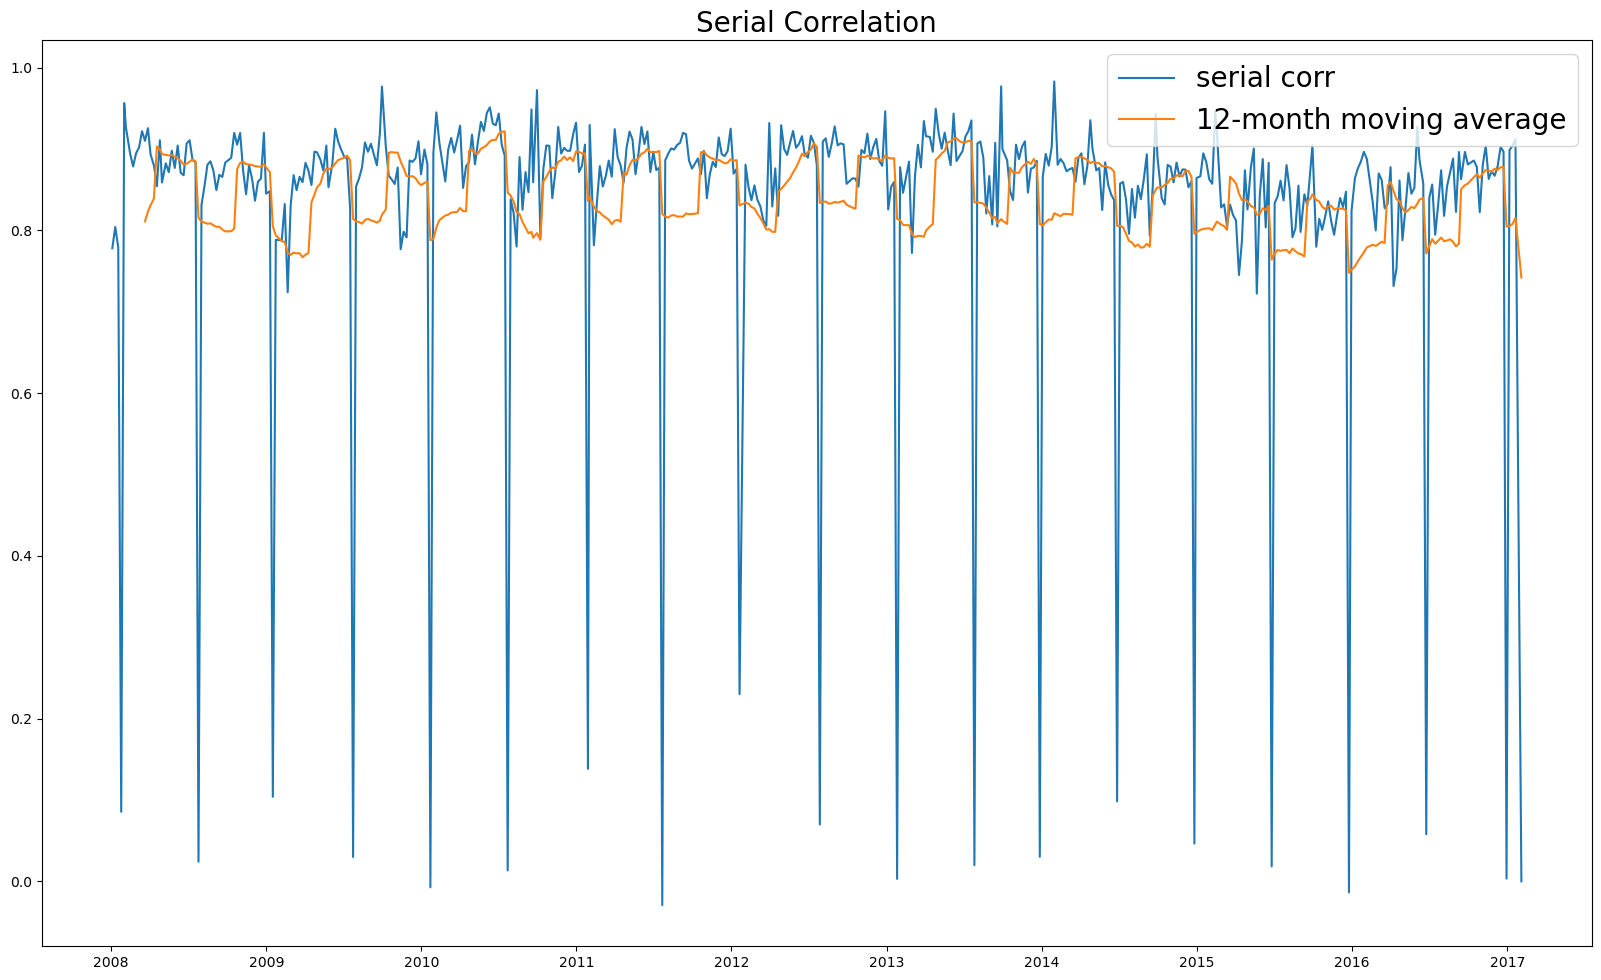

In [434]:
plt.figure(figsize = (20,12),dpi = 100)
plt.plot(back_test['serial_correlation'])
plt.plot(back_test['sc_12MA'])
plt.legend(['serial corr','12-month moving average'] , loc = "upper right" , fontsize = 20)
plt.title('Serial Correlation' , fontsize = 20)

计算索提诺比率

    类似信息比率，但是衡量超额收益相对于下行风险的风险报酬。

In [340]:
def sortino_ratio(data):
    ur = data[data>0]
    DR = np.sqrt( 1/len(data) * sum(ur**2) )
    sr = data.mean() / DR
    return sr

In [343]:
sr1 = sortino_ratio(back_test['rp1'])
sr2 = sortino_ratio(back_test['rp2'])
sr3 = sortino_ratio(back_test['rp3'])
sr4 = sortino_ratio(back_test['rp4'])
sr5 = sortino_ratio(back_test['rp5'])
srS = sortino_ratio(back_test['r'])

Text(0.5, 1.0, 'Sortino Ratio (%)')

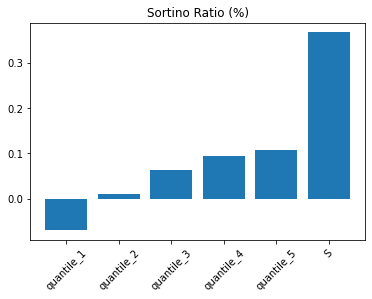

In [345]:
sr = [sr1 , sr2 , sr3 , sr4 , sr5 , srS]
    
plt.bar(['quantile_1' , 'quantile_2' , 'quantile_3' , 'quantile_4' , 'quantile_5' , 'S'],
            sr)
plt.xticks(rotation=45)
plt.title('Sortino Ratio (%)')

计算分位数收益率差

In [348]:
back_test['ts_spread'] = back_test['rp1'] - back_test['rp5']

In [349]:
back_test['ts_spread12MA'] = back_test['ts_spread'].rolling(12).mean()

Text(0.5, 1.0, 'Time Series Spread')

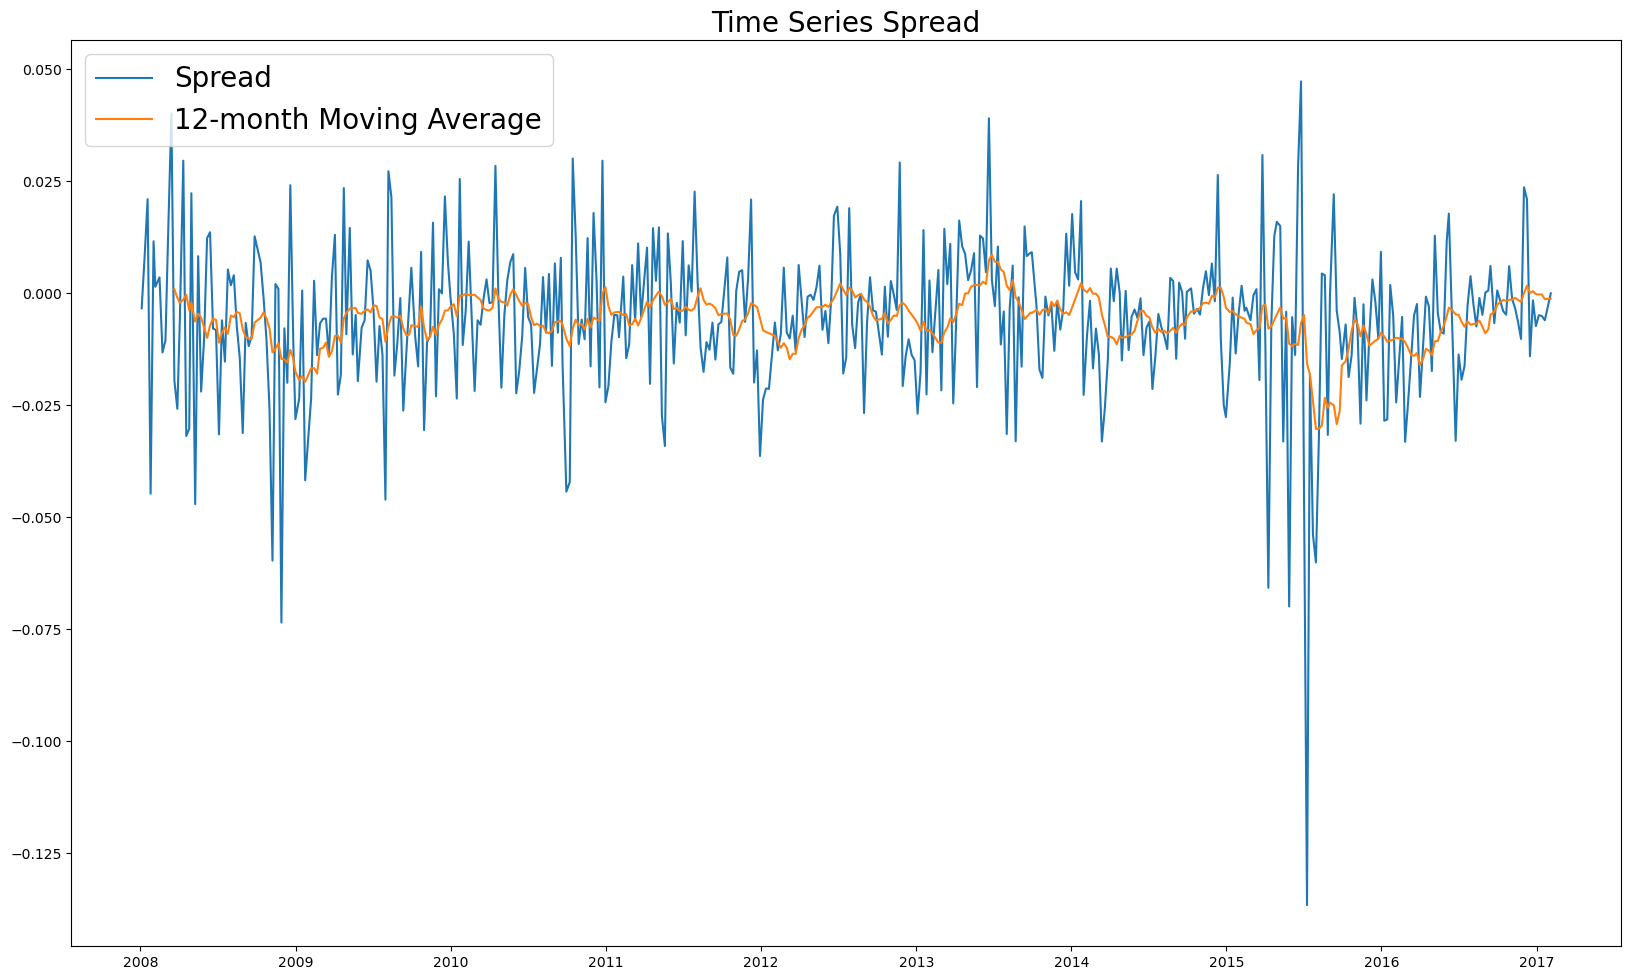

In [388]:
plt.figure(figsize = (20,12), dpi = 100)
plt.plot(back_test['ts_spread'])
plt.plot(back_test['ts_spread12MA'])
plt.legend(['Spread','12-month Moving Average'],loc = "upper left" , fontsize = 20)
plt.title('Time Series Spread' , fontsize = 20)

计算rank IC

    rank IC反映当期股票因子得分排序与未来已实现收益排序之间的相关性。

In [457]:
factors

,2.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,...,603699.0,603737.0,603766.0,603806.0,603866.0,603868.0,603883.0,603899.0,603993.0,603998.0
2008-01-04,-0.21995,NaN,NaN,1.59630,NaN,NaN,-1.02290,NaN,0.64091,0.19340,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-11,0.31943,NaN,NaN,1.07380,NaN,NaN,-0.39264,NaN,0.55589,1.43650,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-18,0.55033,NaN,NaN,1.40900,NaN,NaN,-0.65498,NaN,0.72133,0.74426,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-25,1.01560,NaN,NaN,1.20390,NaN,NaN,-0.46073,NaN,0.56987,0.54226,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-02-01,1.00050,NaN,NaN,1.02750,NaN,NaN,0.29429,NaN,1.58120,0.46247,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-30,1.37410,-1.60420,0.75228,-0.04122,NaN,0.05762,0.43527,0.70468,NaN,0.36888,...,0.31976,0.22292,-0.29593,-0.04119,NaN,-0.55644,0.45398,NaN,0.10724,NaN
2017-01-06,1.71540,-1.37470,0.67616,0.11579,NaN,0.20188,0.31694,0.69422,-0.48587,0.51416,...,0.24583,NaN,-0.25991,-0.00218,-0.21269,-0.34922,0.26210,NaN,0.12918,-1.04870
2017-01-13,1.20560,-1.37270,0.96524,0.91355,NaN,0.22802,0.37231,0.79398,-0.13312,0.04340,...,1.37170,NaN,-0.70751,0.13288,-0.14983,-0.58737,0.14288,NaN,-0.37472,-1.59660
2017-01-20,1.18130,-0.87662,1.03670,0.47278,NaN,1.23350,0.56400,0.20842,-0.49250,0.37845,...,1.22990,NaN,-0.97152,-0.42882,-0.17724,-1.07180,-0.21049,NaN,-0.37095,-0.96489


In [447]:
return_list = list(returns['2008-01-04'].dropna())

In [469]:
factor_list = list(factors.T['2008-01-04'].dropna())

In [476]:
def sorted_id(data): 
    sort_list = list(sorted(range(len(data)), key=lambda k: data[k]))
    return sort_list

In [477]:
factor_sort_list = sorted_id(factor_list)

IndexError: list index out of range

In [471]:
factor_sort_list

[545,
 554,
 925,
 149,
 1064,
 522,
 569,
 432,
 737,
 882,
 120,
 727,
 1125,
 407,
 162,
 76,
 389,
 286,
 546,
 499,
 760,
 416,
 958,
 373,
 905,
 697,
 418,
 942,
 305,
 933,
 810,
 687,
 870,
 756,
 939,
 260,
 350,
 7,
 775,
 969,
 204,
 636,
 375,
 796,
 591,
 374,
 855,
 47,
 245,
 650,
 632,
 589,
 788,
 215,
 670,
 779,
 349,
 435,
 214,
 402,
 1028,
 1018,
 615,
 1120,
 1026,
 242,
 1022,
 251,
 316,
 1049,
 907,
 527,
 471,
 534,
 431,
 398,
 462,
 474,
 992,
 438,
 351,
 1107,
 459,
 437,
 535,
 502,
 1043,
 250,
 317,
 806,
 95,
 1069,
 548,
 761,
 867,
 647,
 427,
 723,
 426,
 999,
 604,
 547,
 831,
 976,
 753,
 1041,
 211,
 194,
 441,
 380,
 742,
 734,
 249,
 804,
 404,
 82,
 828,
 941,
 386,
 79,
 25,
 722,
 560,
 517,
 786,
 764,
 91,
 771,
 741,
 683,
 837,
 716,
 30,
 662,
 130,
 811,
 978,
 997,
 440,
 640,
 368,
 663,
 71,
 290,
 530,
 1001,
 412,
 838,
 392,
 46,
 852,
 494,
 628,
 399,
 436,
 1003,
 1108,
 226,
 579,
 376,
 849,
 272,
 409,
 564,
 1099,
 782,
